# ML 1

In [1]:
#Load python modules : Plot, image , numerical python 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.interpolate import interp1d

# Set a useful font library
font1 = {'size'   : 20, 'family':'STIXGeneral'}
#Colors for plotting 
colors = ['teal', 'yellowgreen', 'gold']
#line width for plottting
lw = 2

## We will start with a regression problem using sklearn 

In [2]:
#Load the power spectrum data. Columns: k , P(k) w BAO feature , P(k) w/o BAO feature
dat1 = np.loadtxt("data/PT_z0.dat")
length = len(dat1);

#set training data proportion 
m = int(length*0.5)

k_pt = dat1[:,0]
baotab = dat1[:,1]/dat1[:,2]
bao =  interp1d(k_pt, baotab, kind='linear')

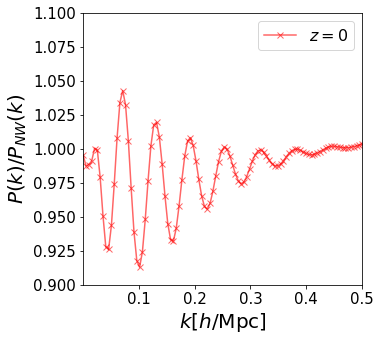

In [3]:
# Plot BAO signal

# Set figure size 
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)

#Plot 1st column against 2nd column 
plt.plot(k_pt, bao(k_pt), label='$z=0$', alpha=0.6 , linestyle='solid', marker='x', color='red')

#Plot the legend
plt.legend(loc='best',prop={'size': 16})

#Set ranges
plt.ylim(0.9,1.1)
plt.xlim(0.001,0.5)

#Format axes 
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('$ P(k)/P_{NW}(k)$',**font1)
plt.xlabel('$k [h/{\\rm Mpc}]$', **font1)
plt.legend(loc='best',prop={'size': 16})

In [4]:
X_plot.shape

NameError: name 'X_plot' is not defined

[]

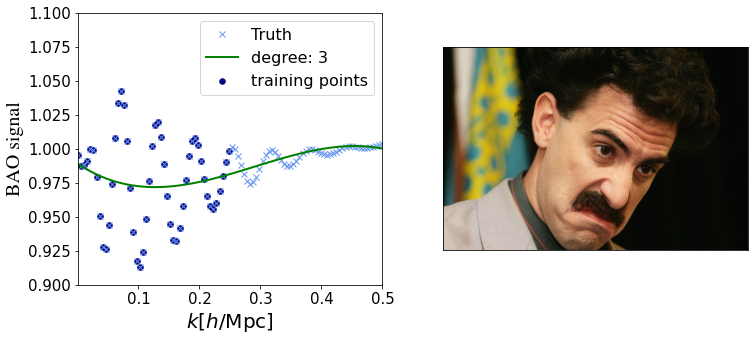

In [5]:
# Let's try to apply linear regression to this problem....

#Load sklearn regression algorithm 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Set degree of polynomial, regularisation and maximum k to plot
mylam = 0
degree = 3
kmax = 0.5

# Training set 
train_k = dat1[:m,0]
train_bao = bao(train_k)

# Test set 
test_k = dat1[:,0]
test_bao = bao(test_k)


# create matrix versions of these arrays
X = train_k[:, np.newaxis]
X_plot = test_k[:, np.newaxis]


# The ridge model fits with a cost function : 
#  J(w) = ||y - Xw||^2_2 + alpha * ||w||^2_2  

mycost = Ridge(alpha=mylam)

model = make_pipeline(PolynomialFeatures(degree), mycost)
model.fit(X, train_bao)
y_plot = model.predict(X_plot)

plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)

plt.plot(test_k, test_bao, color='cornflowerblue', linestyle ='none', marker='x' , linewidth=lw,label="Truth")

plt.scatter(train_k, train_bao, color='navy', s=30, marker='o', label="training points")

plt.plot(test_k, y_plot, color='green', linewidth=lw, label="degree: %d" % degree)


plt.legend(loc='lower left')
#Set ranges
plt.ylim(0.9,1.1)
plt.xlim(0.001,kmax)

#Format axes 
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel(' BAO signal ',**font1)
plt.xlabel('$k [h/{\\rm Mpc}]$', **font1)
plt.legend(loc='best',prop={'size': 16})

ax = plt.subplot(1,2,2)
if (degree>20 and kmax<0.26): 
    img = mpimg.imread('data/images/bor2.jpg')
else : 
    img = mpimg.imread('data/images/bor1.jpg')
    
plt.imshow(img)

ax.set_xticks([])
ax.set_yticks([])

## Let's try a classification example: power spectra into f(R) and GR  classes

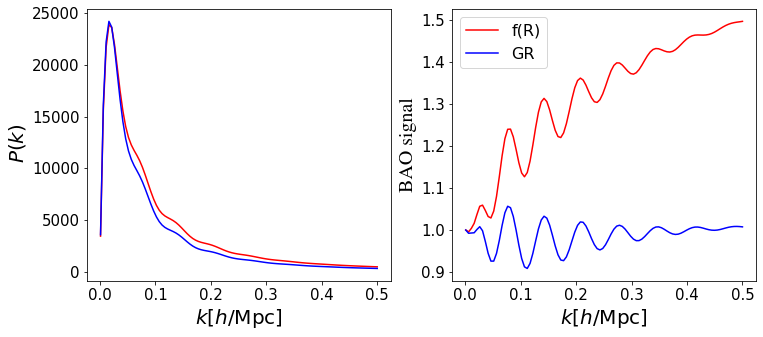

In [6]:
# Load some examples to investigate 

exampleno = 50

#Columns: k , P(k) w BAO feature , P(k) w/o BAO feature
fr_exp = np.loadtxt('data/class/fr_mlg/'+str(exampleno)+'.txt')
gr_exp = np.loadtxt('data/class/gr_mlg/'+str(exampleno)+'.txt')


plt.figure(figsize=(12,5))

ax = plt.subplot(1,2,1)
#Pure spectra 
plt.plot(fr_exp[:,0],fr_exp[:,1], color='r')
plt.plot(gr_exp[:,0],gr_exp[:,1], color='b')

ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel(' $P(k)$ ',**font1)
plt.xlabel('$k [h/{\\rm Mpc}]$', **font1)

ax = plt.subplot(1,2,2)
#BAO signal 
plt.plot(fr_exp[:,0],fr_exp[:,1]/fr_exp[:,2], color='r', label='f(R)')
plt.plot(gr_exp[:,0],gr_exp[:,1]/gr_exp[:,2], color='b', label='GR')

ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel(' BAO signal ',**font1)
plt.xlabel('$k [h/{\\rm Mpc}]$', **font1)
plt.legend(loc='best',prop={'size': 16})


There is a clear enhancement of power in f(R) cosmologies - we can use this to classify the spectra 

We will load the values very crudely - Pandas tutorial will teach us how to do this more elegantly! 

In [7]:
# Load a high k value array from k = 0.1 to 0.25
dat2 = np.loadtxt('data/class/gr_mlg/1.txt')
kvalues = fr_exp[20:50,0]
print(kvalues)

[0.1018081 0.1068485 0.1118889 0.1169293 0.1219697 0.1270101 0.1320505
 0.1370909 0.1421313 0.1471717 0.1522121 0.1572525 0.1622929 0.1673333
 0.1723737 0.1774141 0.1824545 0.1874949 0.1925354 0.1975758 0.2026162
 0.2076566 0.212697  0.2177374 0.2227778 0.2278182 0.2328586 0.237899
 0.2429394 0.2479798]


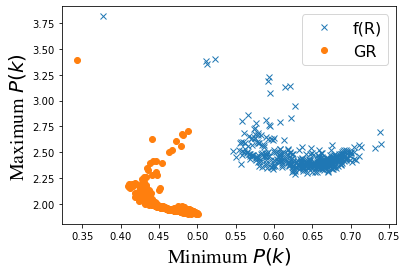

In [8]:
# Get number of examples per class 
import os
path, dirs, files = next(os.walk("./data/class/fr_mlg"))
file_count = len(files) # We set aside 100 values for testing!  

# number of files to be included in test set 
test_set = 101

# Define an array to store the various values of P(k) at a low k and another at a high k
high_fr = []
high_gr = []
low_fr = []
low_gr = []


#Maximum and minimum index to find maximum and minimum of spectrum 
maxi = 50
mini = 20

# Load the P(k) values per k 
for i in range(file_count-test_set):
    datfr = np.loadtxt('data/class/fr_mlg/'+str(i+1)+'.txt')
    datgr = np.loadtxt('data/class/gr_mlg/'+str(i+1)+'.txt')
    
    #perform rough feature normalisation 
    norm = np.mean(datgr[mini:maxi,1])
    
    high_fr.append(np.max(datfr[mini:maxi,1]/norm))
    low_fr.append(np.min(datfr[mini:maxi,1]/norm))  
    high_gr.append(np.max(datgr[mini:maxi,1]/norm))
    low_gr.append(np.min(datgr[mini:maxi,1]/norm))

    
    
total_low = np.concatenate((low_gr,low_fr), axis=None)
total_high = np.concatenate((high_gr,high_fr), axis=None)


plt.plot(low_fr,high_fr, linestyle='none',marker='x', label='f(R)')
plt.plot(low_gr,high_gr, linestyle='none',marker='o', label='GR')
plt.ylabel('Maximum $P(k)$ ',**font1)
plt.xlabel('Minimum $P(k)$', **font1)
plt.legend(loc='best',prop={'size': 16})


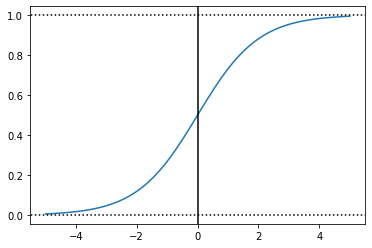

In [9]:
# Let's now fit a decision boundary to this - linear will work well

# Define logistic function first 
def sigmoid(x):
    return 1/(1+np.exp(-x))

xplot = np.linspace(-5,5,100)

plt.plot(xplot,sigmoid(xplot))
plt.axvline(x=0., ymin=0., ymax=10,color='k')
plt.axhline(y=1., xmin=-5, xmax=5,color='k',linestyle='dotted')
plt.axhline(y=0., xmin=-5, xmax=5,color='k',linestyle='dotted')

In [10]:
#Define our cost function 
# x is an 3 x m matrix - (1, x1, x2) per example , x1 and x2 are our features (max and min P(k))
# y is an m x 1 matrix - 0 or 1 per example 
# w is an 3 x 1 matrix - (bias, w1, w2) 
# w.T is w transpose 

def mycost(w,x,y,m):
    myunity = np.ones(m)
    sigmoidmat = sigmoid(np.matmul(x.T,w))    
    term1 = np.matmul(y.T,np.log(sigmoidmat))
    
    term2 = np.matmul((myunity-y).T,np.log(myunity-sigmoidmat))
    
    return -1/m * (term1 + term2)

In [11]:
# Create matrix of features 
bias = np.ones((file_count-test_set)*2)
training_x = np.concatenate(([bias],[total_low],[total_high]))
# Create vector of 'right' answers 
training_y = np.concatenate((np.zeros((file_count-test_set)),np.ones((file_count-test_set))))


# Test cost function for initial guess 
winit = np.array([10,-10,1])
mycost(winit, training_x, training_y , (file_count-test_set)*2)

3.6940876948180654

In [12]:
# Use scipy module to optimise the function using a gradient descent algorithm
import scipy.optimize as optimize

xopt = optimize.fmin(mycost, winit , args=(training_x, training_y , (file_count-test_set)*2), xtol=1e-5, disp=True)

print(xopt)

Optimization terminated successfully.
         Current function value: 0.000641
         Iterations: 295
         Function evaluations: 540
[-129.78910374  153.54799972   19.65260624]


/Users/Viraj.Nistane/opt/anaconda3/envs/MLmeet/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/Viraj.Nistane/opt/anaconda3/envs/MLmeet/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in matmul
  if sys.path[0] == '':


[]

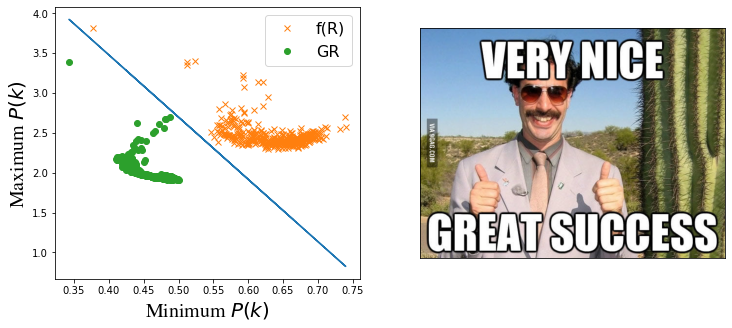

In [13]:
#Plot decision boundary
def decbound(w,x):
    return -(w[0] + w[1]*x)/w[2]


plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
plt.plot(total_low, decbound(xopt,total_low))
plt.plot(low_fr,high_fr, linestyle='none',marker='x', label='f(R)')
plt.plot(low_gr,high_gr, linestyle='none',marker='o', label='GR')
plt.ylabel('Maximum $P(k)$ ',**font1)
plt.xlabel('Minimum $P(k)$', **font1)
plt.legend(loc='best',prop={'size': 16})


ax = plt.subplot(1,2,2)
img = mpimg.imread('data/images/bor3.jpg')
plt.imshow(img)

ax.set_xticks([])
ax.set_yticks([])

In [20]:
# Let's check how accurate our fit is 

# Define a prediction based on our fit 
def predictor(x1,x2):
    if(sigmoid(xopt[0] + xopt[1]*x1 + xopt[2]*x2)>=0.5):
        return 1
    return 0

# Create test data from the  unused examples
high_frt = []
high_grt = []
low_frt = []
low_grt = []

for i in range(file_count-test_set,file_count-1):
    
    datfr = np.loadtxt('data/class/fr_mlg/'+str(i+1)+'.txt')
    datgr = np.loadtxt('data/class/gr_mlg/'+str(i+1)+'.txt')
    
    #perform rough feature normalisation 
    norm = np.mean(datgr[mini:maxi,1])
    
    high_frt.append(np.max(datfr[mini:maxi,1]/norm))
    low_frt.append(np.min(datfr[mini:maxi,1]/norm))  
    high_grt.append(np.max(datgr[mini:maxi,1]/norm))
    low_grt.append(np.min(datgr[mini:maxi,1]/norm))

    
total_low_test = np.concatenate((low_grt,low_frt), axis=None)
total_high_test = np.concatenate((high_grt,high_frt), axis=None)

# Create matrix of features 
test_x = np.concatenate(([total_low_test],[total_high_test]))
# Create vector of 'right' answers 
test_y = np.concatenate((np.zeros((test_set-1)),np.ones((test_set-1))))

# Calculate the accuracy 
myacc = 0

for i in range(test_set*2-2):
    if(predictor(test_x[0][i],test_x[1][i])==test_y[i]):
        myacc +=1 
        
print(myacc/(test_set*2-2))

0.995


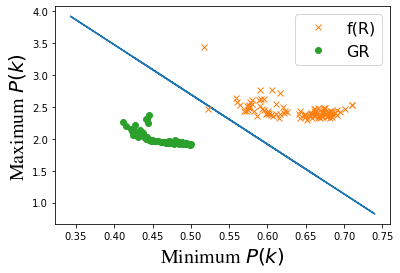

In [21]:
plt.plot(total_low, decbound(xopt,total_low))
plt.plot(low_frt,high_frt, linestyle='none',marker='x', label='f(R)')
plt.plot(low_grt,high_grt, linestyle='none',marker='o', label='GR')
plt.ylabel('Maximum $P(k)$ ',**font1)
plt.xlabel('Minimum $P(k)$', **font1)
plt.legend(loc='best',prop={'size': 16})

## Exercise 

How many polynmial features do you need to fit the non-linearities due to gravity in the power spectrum down to k=0.4 at z=1 given a set of measurement errors? 

In [16]:
#Load the power spectrum data. Columns: k , P_Linear(k) P_Nonlinear(k) , errors (2 sigma)
datex = np.loadtxt("data/Pnl.dat")

k_ex = datex[:,0]
plin_ex = datex[:,1]
pnl_ex = datex[:,2]
err_ex = datex[:,3]

Text(0.5, 0, '$k [h/{\\rm Mpc}]$')

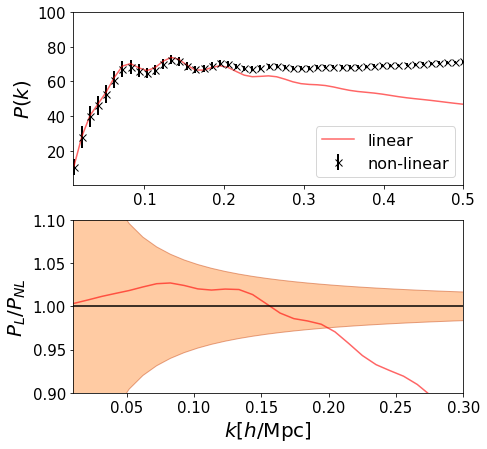

In [17]:
# Plot spectra and errors

# Set figure size 
plt.figure(figsize=(7,7))
ax = plt.subplot(2,1,1)

#Plot 1st column against 2nd column 
plt.plot(k_ex, k_ex**(3/2) * plin_ex , alpha=0.6 , linestyle='solid', color='red', label ='linear')

plt.errorbar(k_ex, (k_ex)**(3/2)*pnl_ex , [(k_ex)**(3/2)*err_ex, (k_ex)**(3/2)*err_ex] , color='black', marker='x', linestyle='none', markersize=7, lw=2.0, label='non-linear')


#Plot the legend
plt.legend(loc='best',prop={'size': 16})

#Set ranges
plt.ylim(0.01,100)
plt.xlim(0.01,0.5)

#Format axes 
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('$ P(k) $',**font1)
plt.legend(loc='best',prop={'size': 16})


ax = plt.subplot(2,1,2)

#Plot an error band 
y = 1.
plt.fill_between(k_ex, y+err_ex/pnl_ex, y-err_ex/pnl_ex, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

#Plot the ratio of llinear to non-linear
plt.plot(k_ex, plin_ex/pnl_ex , alpha=0.6 , linestyle='solid', color='red', label ='linear')

plt.axhline(y=1., xmin=0., xmax=10,color='k')

plt.ylim(0.9,1.1)
plt.xlim(0.01,0.3)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.ylabel('$ P_L/P_{NL} $',**font1)
plt.xlabel('$k [h/{\\rm Mpc}]$', **font1)

